## Wine Quality Prediction Model 

#### Problem Statement
Quality of wine is graded based on the taste of wine and vintage. This process is time taking, costly and not efficient.

A wine itself includes different parameters like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, density, pHsulphates, alcohol and quality.

In industries, understanding the demands of wine safety testing can be a complex task for the laboratory with numerous analytes and residues to monitor.

But, our application's prediction, provide ideal solutions for the analysis of wine, which will make this whole process efficient and cheaper with less human interaction.

#### Objective

Our main objective is to predict the wine quality using machine learning through Python programming language

A large dataset is considered and wine quality is modelled to analyse the quality of wine through different parameters like fixed acidity, volatile acidity etc.

All these parameters will be analysed through Machine Learning algorithms like random forest classifier algorithm which will helps to rate the wine on scale 1 - 10 or bad - good.

Output obtained would further be checked for correctness and model will be optimized accordingly.

It can support the wine expert evaluations and ultimately improve the production

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC     
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB  

import warnings;
warnings.filterwarnings('ignore');

#### Importing and creating a dataframe for the data we need prediction

In [2]:
df=pd.read_csv('C:/Users/pc/Downloads/QualityPrediction.csv')


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Understanding And Visualising Data (EDA)

In [4]:
print("No of Rows:",df.shape[0])
print("No of Columns:",df.shape[1])

No of Rows: 1599
No of Columns: 12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### As we can see there are no null values

In [6]:
df.isna().sum()  #confirmation

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# mean and median values have a significant differnce for total sulphur dioxide

In [9]:
unique_quality=sorted(df.quality.unique())
unique_quality

[3, 4, 5, 6, 7, 8]

#### Hence we are having 6 unique quality values in the data set in range of 1-10

In [10]:
for i in unique_quality:
    print(f"No. of items for 'quality' {i}: {df[df['quality']==i].count()['quality']}")

No. of items for 'quality' 3: 10
No. of items for 'quality' 4: 53
No. of items for 'quality' 5: 681
No. of items for 'quality' 6: 638
No. of items for 'quality' 7: 199
No. of items for 'quality' 8: 18


In [11]:
#or
uni_quality_count=df['quality'].value_counts()
uni_quality_count

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

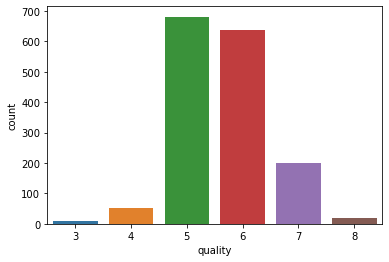

In [12]:
sns.countplot(x='quality', data=df)

#### Both graph and calculated values depicting that max no of items are of quality 5 and 6

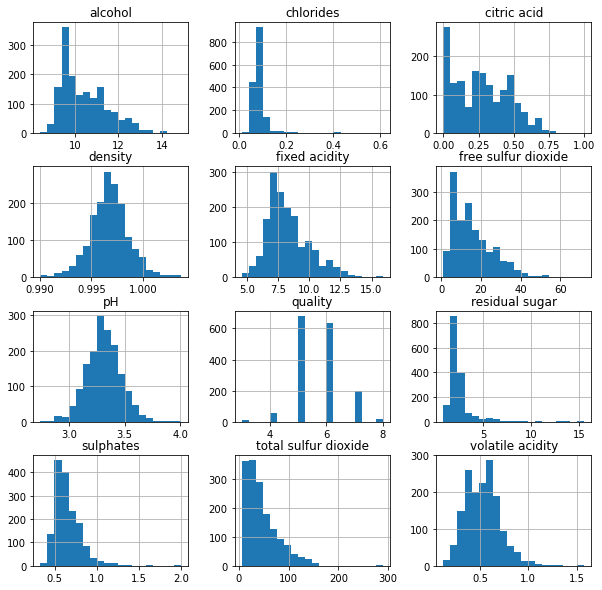

In [13]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

#### Individual graphs with their skewed normal distributions

Text(0, 0.5, 'Probability density')

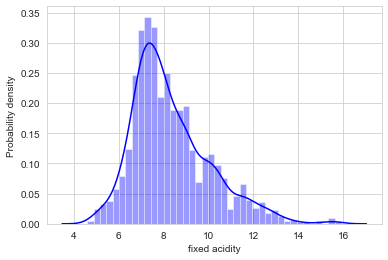

In [14]:
sns.set_style('whitegrid')
k=sns.distplot(df['fixed acidity'], kde = True, color ='blue', bins = 40)  #right skewed 
k.set_ylabel("Probability density")

Text(0, 0.5, 'Probability density')

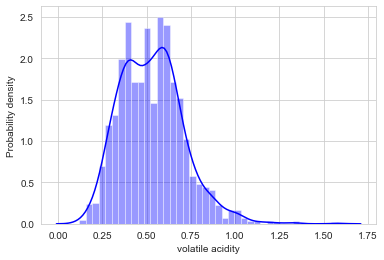

In [15]:
sns.set_style('whitegrid')
k=sns.distplot(df['volatile acidity'], kde = True, color ='blue', bins = 40)#bimodal distribution
k.set_ylabel("Probability density")

Text(0, 0.5, 'Probability density')

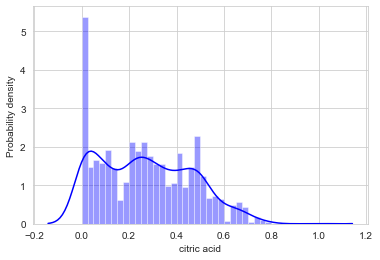

In [16]:
sns.set_style('whitegrid')
k=sns.distplot(df['citric acid'], kde = True, color ='blue', bins = 40) #trimodal distribution
k.set_ylabel("Probability density")

Text(0, 0.5, 'Probability density')

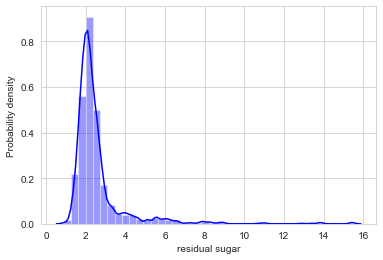

In [17]:
sns.set_style('whitegrid')
k=sns.distplot(df['residual sugar'], kde = True, color ='blue', bins = 40) #Right Skewed (Leptokurtic Curve)
k.set_ylabel("Probability density")

Text(0, 0.5, 'Probability density')

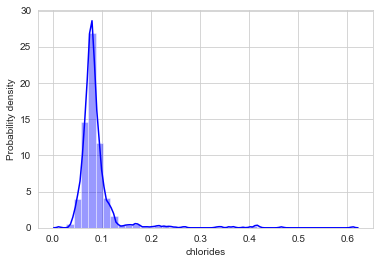

In [18]:
sns.set_style('whitegrid')
k=sns.distplot(df['chlorides'], kde = True, color ='blue', bins = 40) #Right Skewed
k.set_ylabel("Probability density")

Text(0, 0.5, 'Probability density')

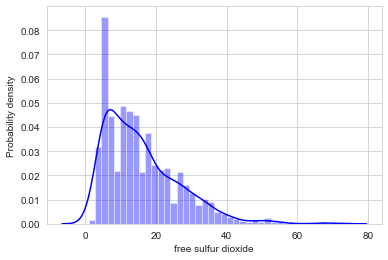

In [19]:
sns.set_style('whitegrid')
k=sns.distplot(df['free sulfur dioxide'], kde = True, color ='blue', bins = 40) #Right Skewed
k.set_ylabel("Probability density")

Text(0, 0.5, 'Probability density')

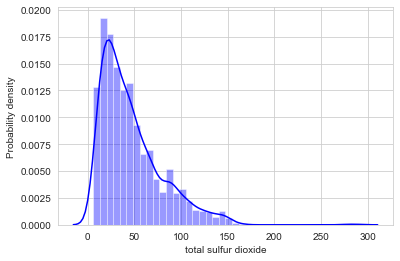

In [20]:
sns.set_style('whitegrid')
k=sns.distplot(df['total sulfur dioxide'], kde = True, color ='blue', bins = 40)  #Right Skewed
k.set_ylabel("Probability density")

Text(0, 0.5, 'Probability density')

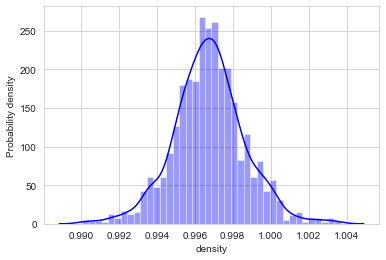

In [21]:
sns.set_style('whitegrid')
k=sns.distplot(df['density'], kde = True, color ='blue', bins = 40)  #Normal Distribution
k.set_ylabel("Probability density")

Text(0, 0.5, 'Probability density')

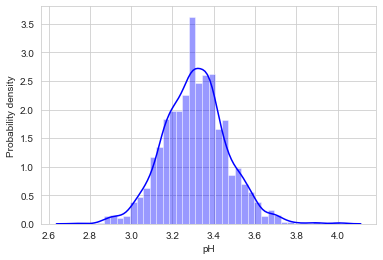

In [22]:
sns.set_style('whitegrid')
k=sns.distplot(df['pH'], kde = True, color ='blue', bins = 40)  #kinda Normal Distribution
k.set_ylabel("Probability density")

Text(0, 0.5, 'Probability density')

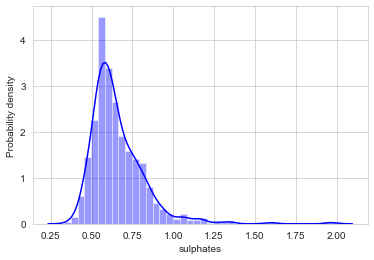

In [23]:
sns.set_style('whitegrid')
k=sns.distplot(df['sulphates'], kde = True, color ='blue', bins = 40)  #kinda right skewed
k.set_ylabel("Probability density")

Text(0, 0.5, 'probability distribution')

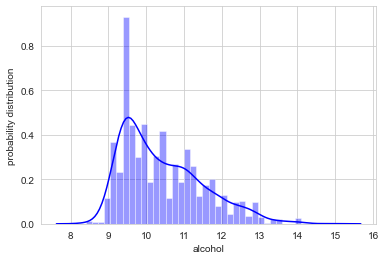

In [24]:
sns.set_style('whitegrid')
k=sns.distplot(df['alcohol'], kde = True, color ='blue', bins = 40)  # kinda bimodal distribution
k.set_ylabel("probability distribution")
# sns.set(rc={'figure.figsize':(6.4,4.8)})

## Correlation and HeatMap

In [25]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


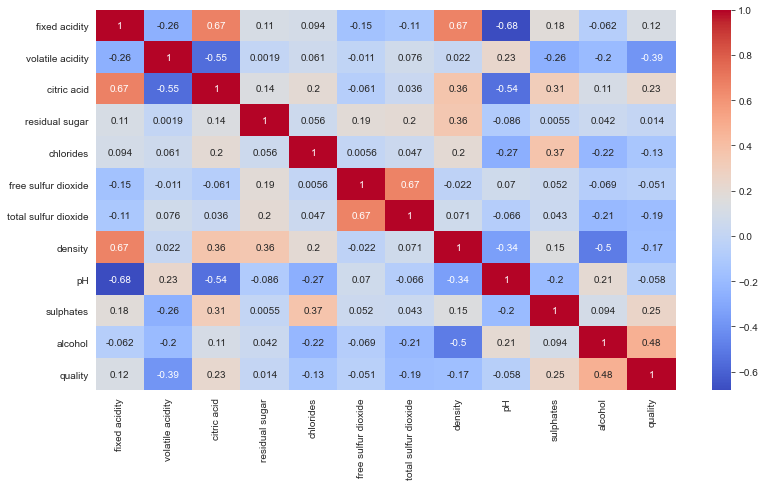

In [26]:
f, ax = plt.subplots(figsize=(13, 7))
ax=sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### Verdict: Our Target variable quality is mostly affected by alcohol
####               It is also affected by volatile acidity, citric acid and sulphates significantly 

In [27]:
df_c=df[['fixed acidity','citric acid','density','pH','volatile acidity','free sulfur dioxide','total sulfur dioxide']]

In [28]:
df_c.corr()

,fixed acidity,citric acid,density,pH,volatile acidity,free sulfur dioxide,total sulfur dioxide
fixed acidity,1.000000,0.671703,0.668047,-0.682978,-0.256131,-0.153794,-0.113181
citric acid,0.671703,1.000000,0.364947,-0.541904,-0.552496,-0.060978,0.035533
density,0.668047,0.364947,1.000000,-0.341699,0.022026,-0.021946,0.071269
pH,-0.682978,-0.541904,-0.341699,1.000000,0.234937,0.070377,-0.066495
volatile acidity,-0.256131,-0.552496,0.022026,0.234937,1.000000,-0.010504,0.076470
free sulfur dioxide,-0.153794,-0.060978,-0.021946,0.070377,-0.010504,1.000000,0.667666
total sulfur dioxide,-0.113181,0.035533,0.071269,-0.066495,0.076470,0.667666,1.000000


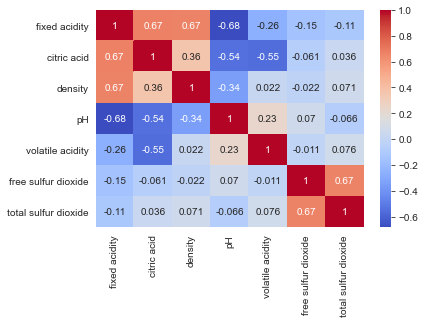

In [29]:
sns.heatmap(df_c.corr(), annot=True, cmap='coolwarm')

#### Verdict :
#### fixed acidity have a strong correlation with citric acid, density and pH 
#### free sulfur dioxide have a strong correlation with total sulfur dioxide
#### citric acid  also holds a good relation with volatile acidity and pH

## Multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [31]:
new_df=df.copy()

In [32]:
n1=new_df.drop(['quality'], axis=1)

In [33]:
op = add_constant(n1)

In [34]:
vif_data = pd.DataFrame()
vif_data["feature"] = op.columns
vif_data

,feature
0,const
1,fixed acidity
2,volatile acidity
3,citric acid
4,residual sugar
5,chlorides
6,free sulfur dioxide
7,total sulfur dioxide
8,density
9,pH


In [35]:
# calculating VIF for each feature
vif_data["VIF"] = [float(format(variance_inflation_factor(op.values,i),".2f")) for i in range(op.shape[1])]


In [36]:
vif_data

,feature,VIF
0,const,1710538.50
1,fixed acidity,7.77
2,volatile acidity,1.79
3,citric acid,3.13
4,residual sugar,1.70
5,chlorides,1.48
6,free sulfur dioxide,1.96
7,total sulfur dioxide,2.19
8,density,6.34
9,pH,3.33


In [37]:
vif_data['Multicolinear']=['yes' if vif_data['VIF'][i]>5 else 'no' for i in range(op.shape[1])]

In [38]:
vif_data.drop(index=0)

,feature,VIF,Multicolinear
1,fixed acidity,7.77,yes
2,volatile acidity,1.79,no
3,citric acid,3.13,no
4,residual sugar,1.70,no
5,chlorides,1.48,no
6,free sulfur dioxide,1.96,no
7,total sulfur dioxide,2.19,no
8,density,6.34,yes
9,pH,3.33,no
10,sulphates,1.43,no


#### Here fixed acidity and density both are having VIF greater that 5. Holding a strong collinearity
#### As fixed acidity and density are positively correlated, hence by "Centering Independent Variables", I am creating a new class (dfa) from them and then checking multicollinearity

In [39]:
n=new_df.drop(['quality'], axis=1)

In [40]:
n['dfa']=(n["density"].mean()-n["density"])*(n["fixed acidity"].mean()-n["fixed acidity"])

In [41]:
n.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,dfa
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-0.000969
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,-0.000028
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,-0.000132
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0.003610
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-0.000969


In [42]:
n=n.drop(["fixed acidity","density"],axis=1)

In [43]:
n.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,dfa
0,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,-0.000969
1,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,-0.000028
2,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,-0.000132
3,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0.003610
4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,-0.000969


In [44]:
op = add_constant(n)
vif_dat = pd.DataFrame()
vif_dat["feature"] = op.columns
vif_dat["VIF"] = [float(format(variance_inflation_factor(op.values,i),".2f")) for i in range(op.shape[1])]
vif_dat

,feature,VIF
0,const,810.53
1,volatile acidity,1.68
2,citric acid,2.26
3,residual sugar,1.10
4,chlorides,1.38
5,free sulfur dioxide,1.94
6,total sulfur dioxide,2.01
7,pH,1.62
8,sulphates,1.34
9,alcohol,1.32


In [45]:
vif_dat['Multicolinear']=['yes' if vif_dat['VIF'][i]>5 else 'no' for i in range(op.shape[1])]

In [46]:
vif_dat.drop(index=0)

,feature,VIF,Multicolinear
1,volatile acidity,1.68,no
2,citric acid,2.26,no
3,residual sugar,1.10,no
4,chlorides,1.38,no
5,free sulfur dioxide,1.94,no
6,total sulfur dioxide,2.01,no
7,pH,1.62,no
8,sulphates,1.34,no
9,alcohol,1.32,no
10,dfa,1.13,no


In [47]:
n=n.join(df["quality"])
n

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,dfa,quality
0,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,-0.000969,5
1,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,-0.000028,5
2,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,-0.000132,5
3,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0.003610,6
4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,-0.000969,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,0.003914,5
1595,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,0.003936,6
1596,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,0.002033,6
1597,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,0.003089,5


#### Hence no multicollinearity now!

## Model Building

Text(0.5, 1.0, 'Distribution of Unique quality of Wine Dataset')

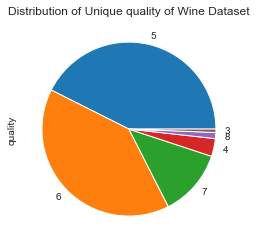

In [48]:
ax=uni_quality_count.plot(kind='pie')
ax.set_title("Distribution of Unique quality of Wine Dataset")

##### wine of quality 5 is most in this data set

In [49]:
uni_quality_count*100/len(df['quality'])  #percentage share for each of them

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

#### Feature Selection

In [50]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [51]:
x = n.iloc[:,:-1]   

In [52]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [53]:
x.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,dfa
0,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,-0.000969
1,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,-0.000028
2,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,-0.000132
3,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0.003610
4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,-0.000969


In [54]:
Y=Y.values.reshape(-1,1)
Y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

#### Train- Test Split

##### Here I will be using two dataframe df and this new 'n', to know whether it was worth to remove multicollinearity or not. How much impact does it make on my predictions.

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=11)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.20,random_state=11)

In [57]:
X_test.shape

(320, 11)

In [58]:
Y_test.shape

(320, 1)

In [59]:
x_test.shape

(320, 10)

#### Feature Scaling

In [60]:
standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)    
X_test = standard_Scaler.transform(X_test)

In [61]:
standard_scaler=StandardScaler()
x_train = standard_scaler.fit_transform(x_train)    
x_test = standard_scaler.transform(x_test)

## Logistic Regression

#### Instantiating and fitting the model to training Dataset

In [62]:
log_reg=LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train,Y_train)    

LogisticRegression(multi_class='multinomial')

In [63]:
log_Reg=LogisticRegression(multi_class='multinomial', solver='lbfgs') 
log_Reg.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

#### Prediction for Test Dataset

In [64]:
Y_pred=log_reg.predict(X_test)
Y_pred #Predicted y test values

array([6, 5, 5, 6, 5, 5, 7, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 7, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 5, 5, 5, 5, 6, 5,
       6, 6, 6, 6, 6, 5, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 5, 6, 6, 6, 6, 6, 5, 7, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 4, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6,
       6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6,
       6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5,
       7, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 7, 6, 7, 6, 6, 6, 6, 7, 6,
       5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5,
       7, 6, 6, 7, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6,
       5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5,
       6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 5, 5,
       5, 6, 5, 5, 5, 6, 7, 5, 5, 6, 6, 6, 7, 6, 5, 6, 6, 5, 6, 6, 6, 5,
       6, 6, 5, 7, 6, 5, 5, 6, 6, 6, 6, 5, 7, 6, 5,

In [65]:
y_pred=log_Reg.predict(x_test)
y_pred

array([7, 5, 5, 6, 5, 5, 7, 5, 6, 6, 5, 6, 5, 4, 5, 5, 5, 7, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 5, 6, 6, 6, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 4, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6,
       6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6,
       6, 5, 6, 5, 6, 5, 6, 7, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5,
       7, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 7, 6, 7, 6, 6, 6, 6, 7, 6,
       5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       7, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6,
       5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5,
       6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 7, 6, 5, 6, 6, 6, 7, 6, 5, 6, 6, 5, 6, 6, 6, 5,
       6, 7, 5, 7, 6, 5, 5, 6, 6, 6, 6, 5, 7, 6, 6,

In [66]:
Y_test  #actual y test values

array([[5],
       [5],
       [5],
       [6],
       [6],
       [5],
       [7],
       [5],
       [5],
       [6],
       [5],
       [6],
       [5],
       [3],
       [6],
       [6],
       [5],
       [7],
       [4],
       [6],
       [5],
       [6],
       [6],
       [6],
       [6],
       [6],
       [5],
       [6],
       [6],
       [6],
       [7],
       [7],
       [6],
       [7],
       [7],
       [5],
       [6],
       [6],
       [6],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [6],
       [7],
       [7],
       [6],
       [7],
       [6],
       [5],
       [5],
       [6],
       [4],
       [5],
       [5],
       [6],
       [4],
       [6],
       [7],
       [5],
       [6],
       [5],
       [5],
       [6],
       [6],
       [7],
       [7],
       [6],
       [6],
       [6],
       [5],
       [7],
       [5],
       [7],
       [5],
       [5],
       [5],
    

#### Confusion Matrix

In [67]:
conf = confusion_matrix(Y_test, Y_pred)
conf


array([[ 0,  0,  3,  0,  0,  0],
       [ 0,  0,  3,  6,  0,  0],
       [ 0,  1, 95, 41,  1,  0],
       [ 0,  0, 38, 76,  5,  0],
       [ 0,  0,  3, 31, 13,  0],
       [ 0,  0,  0,  2,  2,  0]], dtype=int64)

In [68]:
confu = confusion_matrix(y_test, y_pred)
confu

array([[ 0,  1,  2,  0,  0,  0],
       [ 0,  0,  5,  4,  0,  0],
       [ 0,  1, 94, 42,  1,  0],
       [ 0,  0, 37, 77,  5,  0],
       [ 0,  0,  1, 34, 12,  0],
       [ 0,  0,  0,  2,  2,  0]], dtype=int64)

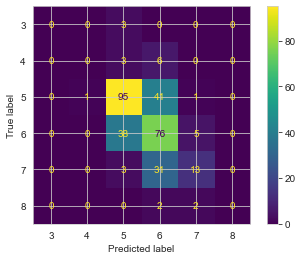

In [69]:
conf_matrix = plot_confusion_matrix(log_reg,X_test,Y_test)
conf_matrix

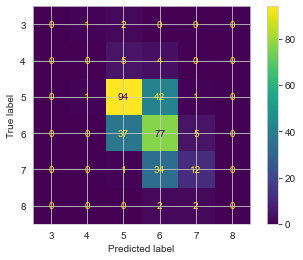

In [70]:
confu_matrix = plot_confusion_matrix(log_Reg,x_test,y_test)
confu_matrix

##### Accuracy, Precision, Recall

In [71]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.67      0.69      0.68       138
           6       0.49      0.64      0.55       119
           7       0.62      0.28      0.38        47
           8       0.00      0.00      0.00         4

    accuracy                           0.57       320
   macro avg       0.30      0.27      0.27       320
weighted avg       0.56      0.57      0.55       320



In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.68      0.68      0.68       138
           6       0.48      0.65      0.55       119
           7       0.60      0.26      0.36        47
           8       0.00      0.00      0.00         4

    accuracy                           0.57       320
   macro avg       0.29      0.26      0.27       320
weighted avg       0.56      0.57      0.55       320



##### As logistic has dichotomous behaviour, it is behaving different as seen in confusion matrix. I tried across several platform for multivariate logistic regression but failed to find the solution. I will surely do further research on that.
##### Even after removing collinearity still both the datasets kinda behaving same (df and n), hence I will be using only df further.

###### ROC and AU curve not possible for multiclass

## Decision Tree

In [3]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [4]:
Y=Y.values.reshape(-1,1)

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=11)

#### with Cart(Gini)

In [108]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt_8.fit(X_train,Y_train)   

Y_pred_8 = model_dt_8.predict(X_test)
accuracy_score_8 = accuracy_score(Y_test,Y_pred_8)
print('Accuracy Score for model with depth 4 is: ',accuracy_score_4)

Accuracy Score for model with depth 4 is:  0.59375


In [109]:
model_dt_ent = DecisionTreeClassifier(random_state = 1, max_depth=8,criterion='entropy')
model_dt_ent.fit(X_train,Y_train)

Y_pred_ent = model_dt_ent.predict(X_test)

Accuracy_score = accuracy_score(Y_test,Y_pred_ent)
print('Accuracy Score for model with depth 8 is: ',Accuracy_score)

Accuracy Score for model with depth 8 is:  0.596875


In [110]:
print(classification_report(Y_test,Y_pred_8))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.67      0.72      0.69       138
           6       0.53      0.62      0.57       119
           7       0.68      0.36      0.47        47
           8       0.00      0.00      0.00         4

    accuracy                           0.59       320
   macro avg       0.31      0.28      0.29       320
weighted avg       0.59      0.59      0.58       320



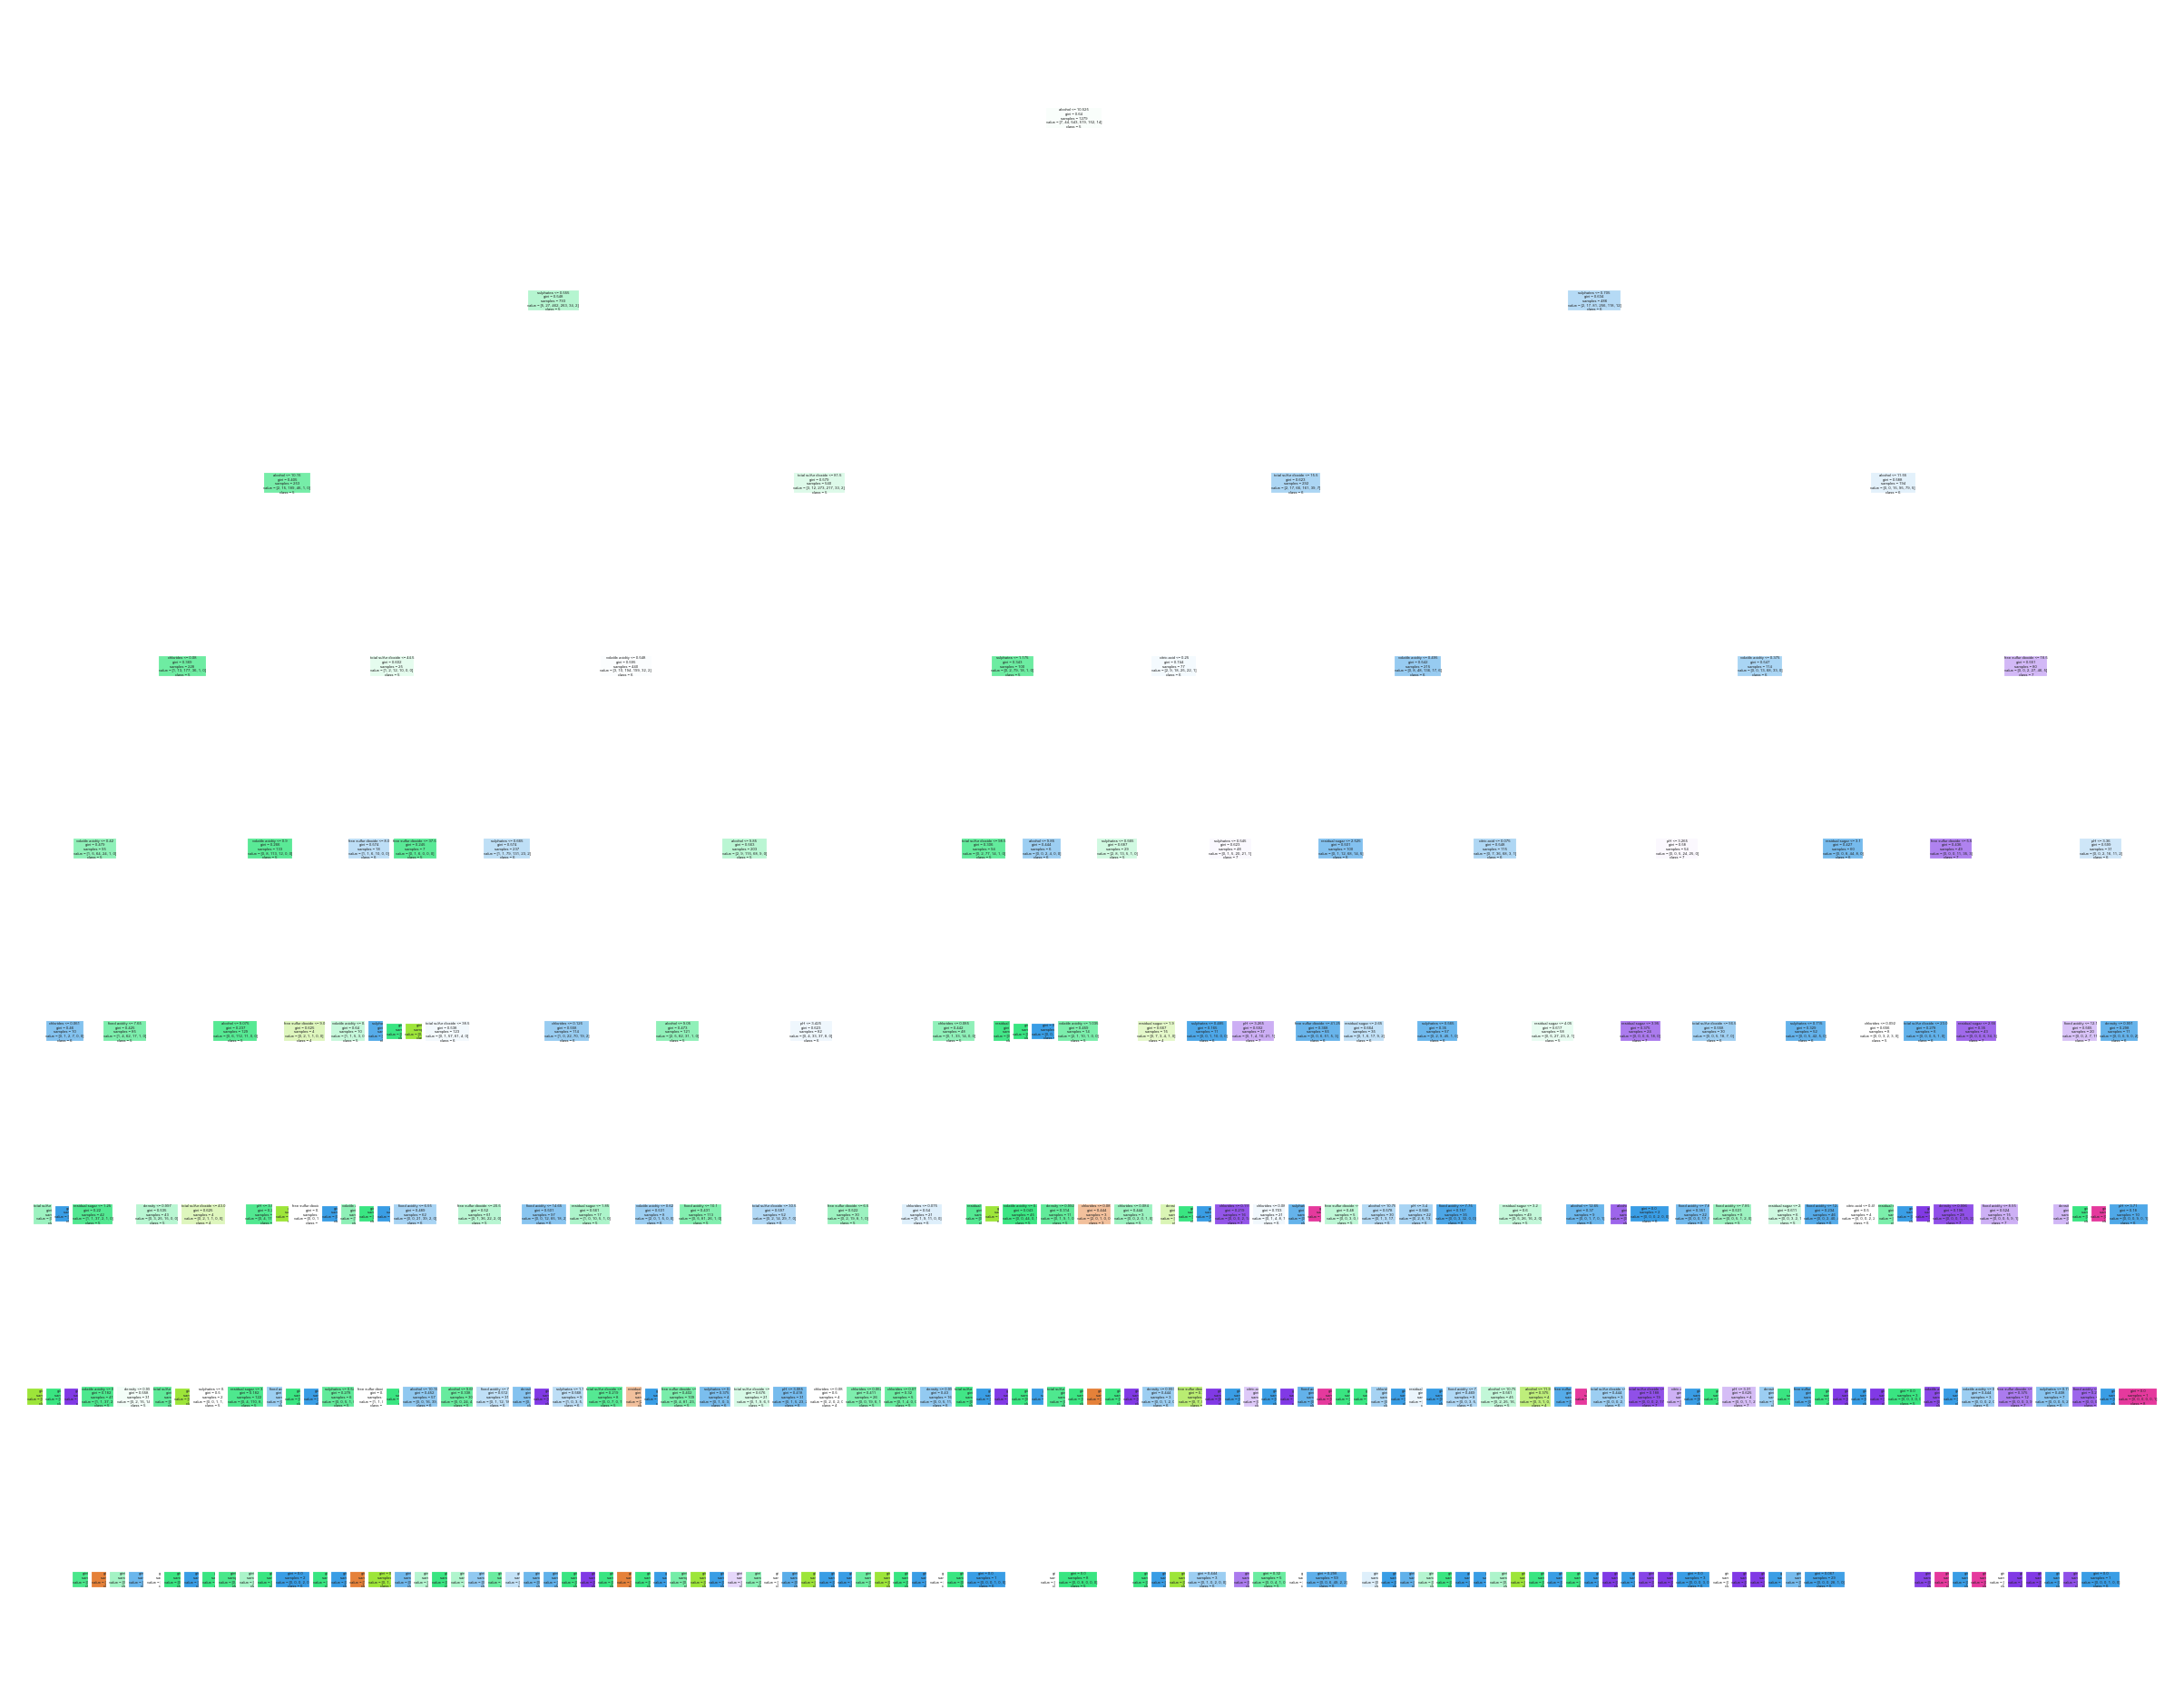

In [111]:
from sklearn import tree
df1=pd.DataFrame(df.drop(['quality'],axis=1))    #x or all predictor features
column_names=list(df1.columns)
fn=column_names    #list of features to be splitted (predictor variables)
cn=['3','4','5','6','7','8']   #class names or the categories of Target Variable

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)

tree.plot_tree(model_dt_8,
           feature_names = fn, 
           class_names=cn,
           filled = True);

fig.savefig('DecisionTreeComplete.png')

## Random Forest

In [112]:
fit_rf = RandomForestClassifier()

In [113]:
param_dist = {'max_depth': [2, 3, 4, 8],
              'max_features': ['auto', 'sqrt', 'log2', None],   
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, verbose = 1,
                     n_jobs = 3)

cv_rf.fit(X_train, Y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   10.2s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   41.2s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done 640 out of 640 | elapsed:  2.7min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 8],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             verbose=1)

In [114]:
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}


In [115]:
fit_rf.fit(X_train, Y_train)
Y_Pred = fit_rf.predict(X_test)

In [116]:
Y_Pred

array([6, 5, 6, 6, 5, 5, 7, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 7, 6, 6, 5, 6,
       5, 6, 6, 6, 5, 6, 5, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5,
       5, 5, 5, 6, 6, 7, 6, 6, 6, 7, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6,
       7, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6,
       6, 6, 5, 5, 6, 7, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       6, 5, 6, 6, 6, 5, 6, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 6, 5,
       7, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 7, 6, 7, 7, 6, 6, 6, 7, 6,
       6, 7, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5,
       6, 6, 7, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 7, 5, 5, 6, 5, 6, 5,
       6, 6, 6, 5, 7, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 7, 5, 5, 6, 6, 6, 6, 7, 5, 6, 6, 5, 5, 7, 6, 5,
       6, 6, 5, 7, 6, 6, 5, 7, 6, 5, 6, 5, 7, 5, 5,

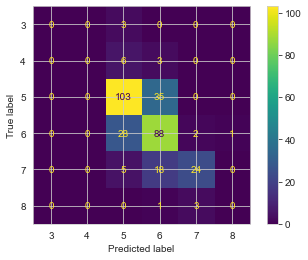

In [117]:
plot_confusion_matrix(fit_rf, X_test, Y_test)

In [118]:
print(classification_report(Y_test,Y_Pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.71      0.75      0.73       138
           6       0.61      0.74      0.67       119
           7       0.83      0.51      0.63        47
           8       0.00      0.00      0.00         4

    accuracy                           0.67       320
   macro avg       0.36      0.33      0.34       320
weighted avg       0.65      0.67      0.65       320



##### Highest accuracy till now among the models is holding random forest

##### Verdict: Not able to predict 3,4,8 quality

#### Cross validation

In [119]:
scores = cross_val_score(fit_rf, X_train, Y_train, cv=10)
scores

array([0.6875    , 0.7421875 , 0.7109375 , 0.703125  , 0.6640625 ,
       0.671875  , 0.65625   , 0.71875   , 0.71875   , 0.67716535])

In [120]:
scores.mean()

0.6950602854330709

## K nearest Neighbors

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Finding suitable k as 3 is not suitable

In [40]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,Y,cv=10) 
    accuracy_rate.append(score.mean())

In [41]:
error_rate = []

# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,Y,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

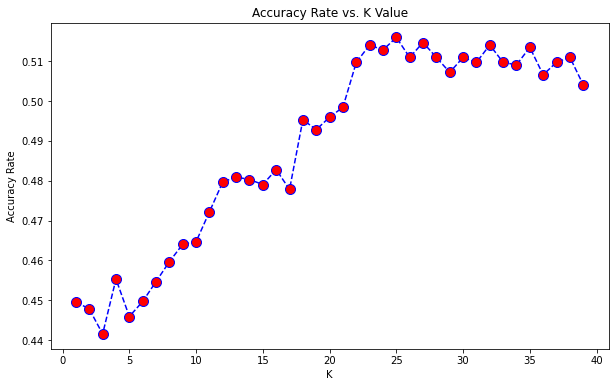

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

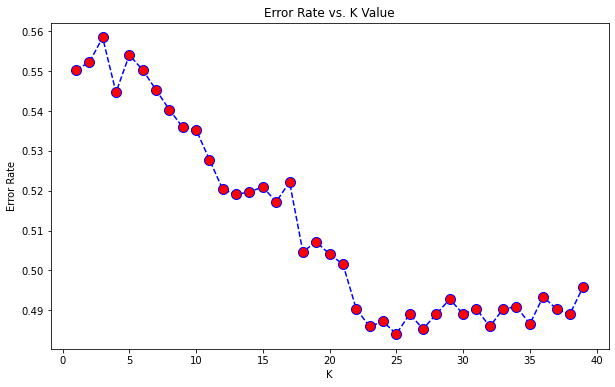

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



##### Hence according to the graph, taking k=34

In [44]:
knn = KNeighborsClassifier(n_neighbors=34)

In [45]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=34)

In [46]:
pred = knn.predict(X_test)

In [47]:
print(confusion_matrix(Y_test,pred))

[[  0   0   3   0   0   0]
 [  0   0   9   0   0   0]
 [  0   0 138   0   0   0]
 [  0   0 119   0   0   0]
 [  0   0  42   5   0   0]
 [  0   0   4   0   0   0]]


In [48]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.44      1.00      0.61       138
           6       0.00      0.00      0.00       119
           7       0.00      0.00      0.00        47
           8       0.00      0.00      0.00         4

    accuracy                           0.43       320
   macro avg       0.07      0.17      0.10       320
weighted avg       0.19      0.43      0.26       320



##### getting predictions for 5 only, not working in multiclass way

## Naive Baye's

In [6]:
model = GaussianNB()

model.fit(X_train, Y_train)

GaussianNB()

In [7]:
pred = model.predict(X_test)
mat = confusion_matrix(Y_test, pred)       #Multiclass Confusion Matrix
print(mat)

[[ 0  2  1  0  0  0]
 [ 0  2  3  4  0  0]
 [ 0 11 84 34  9  0]
 [ 0 14 30 63 11  1]
 [ 0  4  4 16 21  2]
 [ 0  0  0  2  2  0]]


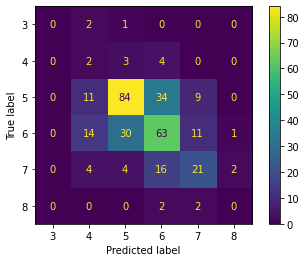

In [8]:
plot_confusion_matrix(model, X_test, Y_test)

In [9]:
print(classification_report(pred, Y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.22      0.06      0.10        33
           5       0.61      0.69      0.65       122
           6       0.53      0.53      0.53       119
           7       0.45      0.49      0.47        43
           8       0.00      0.00      0.00         3

    accuracy                           0.53       320
   macro avg       0.30      0.29      0.29       320
weighted avg       0.51      0.53      0.52       320



## SVM

##### Optimizing by gridsearch CV

In [8]:
svc = SVC(random_state = 5)

In [9]:
tuned_parameter = {'C': [0.1, 1, 10, 100, 1000],        
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],   
              'kernel': ['linear','rbf','poly']}


In [10]:
model_svm = GridSearchCV(svc,tuned_parameter,cv = 10, scoring='accuracy', 
                         verbose = 1, n_jobs = 3)

In [ ]:
model_svm.fit(X_train,Y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    9.1s
[Parallel(n_jobs=3)]: Done 247 tasks      | elapsed:   52.4s


In [ ]:
print(model_svm.best_params_)

In [11]:
svc = SVC(kernel='rbf',C=1,gamma=0.1)
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)


In [13]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.54375


In [15]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.60      0.72      0.66       138
           6       0.45      0.55      0.49       119
           7       0.83      0.21      0.34        47
           8       0.00      0.00      0.00         4

    accuracy                           0.54       320
   macro avg       0.31      0.25      0.25       320
weighted avg       0.55      0.54      0.52       320



##### Still 3,4,8 not coming in picture

#### Conclusion: Among all only random Forest was able to hold that an accuracy of 68%. But the proble I faced was Multivariate class predicted output not coming as it should be. I think I am missing some steps but unable to configure them. Also because of this in whole project I was not able to plot roc curve along with au. Please after analysis tell me the approch I did wrong so I can modify it.